# BIG DATA ANALYTICS- ASHWANI KUMAR GH1029485

# Dataset

The dataset is too heavy to operate on, so I am using a part of this dataset as the entire dataset.

**LINK:** https://www.kaggle.com/datasets/simaanjali/emotion-analysis-based-on-text/code


# Introduction

Emotion analysis, also referred to as sentiment analysis, is a natural language processing (NLP) method that detects the emotional tone embedded in a piece of text. As the volume of data coming out of social media, blogs, and reviews grows daily, emotion analysis can help us understand public sentiment. The machine learning techniques used in this notebook can be used to classify such emotions from text data: practical applications include the analysis of customer feedback, mental health monitoring, and understanding social trends.

# Problem Statement

Text is subjective, unpredictable, and difficult to understand human emotions. Although traditional rule-based approaches cannot capture the nuances of emotional language. The target of this project is to construct a machine-learning model that classifies any textual data into a given category of emotions properly. In this study, I preprocess the data and utilize efficient feature extraction techniques in order to enhance the performance of emotion analysis models in terms of classification accuracy and robustness.

# Benefits and Importance

This notebool highlights the practical applications of emotion classification in customer support, mental health monitoring, market analysis, social impact, and automation, highlighting its potential to improve service quality, monitor emotional well-being, and ensure scalability for large datasets.

# Work Flow

**Data Collection:**

From Kaggle, the dataset is sourced and consists of text describing different emotions.

**Data Preprocessing:**

Clean data is created (i.e., removing duplicates, punctuation, stopwords, and irrelevant text patterns).

Convert text to lowercase and remove single-character tokens.

**Feature Extraction:**

When dealing with textual data, I want to convert it into a numerical format that’s compatible with machine learning algorithms, using the TF (term frequency) and IDF (inverse document frequency) vectorizer.

**Model Training:**

The processed and vectorized data is used to train a logistic regression model, a supervised learning algorithm, using loaded data.

**Evaluation:**

From there I can then evaluate the model.

**Prediction:**

Show how I can predict emotions with the model for text inputs that you have not seen before or text inputs that you custom-created.

# Code

**Importing Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import  stopwords
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

SEED = 99

By using seed it ensures that the reproducibility of randomized operations like data splitting is guaranteed. And the results become consistent by setting a fixed seed.


**Loading the Dataset**

In [20]:
emo = pd.read_csv('emotions.csv')
emo = emo.drop_duplicates(subset = ['text'], keep = 'first').reset_index(drop = True)
emo.drop(['Unnamed: 0'], axis = 1, inplace = True)
emo.head()

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


**Data Preprocessing**

In [32]:
import nltk

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def text_preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\w*xx+\w*', '', text)
    return text

I removed stop words and single character words using additional cleaning functions.

This step cuts up the data into nice, reliable text that can be used for analysis. Think of it as preparing vegetables before cooking: first of all, we wash, peel, and chop them so we can get rid of anything unnecessary.

In [23]:
def drop_stopwords(text):
    dropped = [word for word in text.split() if word not in stop_words]
    final_text = ' '.join(dropped)
    return final_text


def delete_one_characters(text):
    deleted = [word if len(word)>1 else "" for word in text.split()]
    final_text = ' '.join(deleted)
    return final_text


# applying preprocessing functions
data_processed = emo.copy()
data_processed['preprocessed_text'] = data_processed['text'].apply(text_preprocessing).apply(drop_stopwords).apply(delete_one_characters)


# label encoding
LE = LabelEncoder()
data_processed['encoded_Emotion'] = LE.fit_transform(data_processed['Emotion'])

In this step the text is preprocessed with the removal of stopwords and single character words and then label encoded to convert category emotion labels into numeric values for subsequent machine learning tasks.

In [25]:
data_processed.head()

,text,Emotion,preprocessed_text,encoded_Emotion
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...,6
1,im so full of life i feel appalled,neutral,im full life feel appalled,8
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feelings think afraid acce...,8
3,ive been really angry with r and i feel like a...,anger,ive really angry feel like idiot trusting fir...,0
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...,8


In [26]:
# classes
data_processed['Emotion'].value_counts()

,count
Emotion,
neutral,39968
love,2148
happiness,1643
relief,995
sadness,968
hate,910
anger,781
fun,561
enthusiasm,547


The `value_counts()` function counts the frequency of each unique emotion in the 'Emotion' column of the `data_processed` DataFrame, providing a distribution of emotion labels.

**Testing and Training**

In [27]:
type_train_data, type_test_data = train_test_split(data_processed, test_size = 0.15, random_state = SEED, stratify = data_processed['encoded_Emotion'])

type_train_data = type_train_data.reset_index(drop = True)
type_test_data = type_test_data.reset_index(drop = True)

y_train = type_train_data['encoded_Emotion']
y_test = type_test_data['encoded_Emotion']

print('train sample size\t', type_train_data.shape[0])
print('test sample size\t', type_test_data.shape[0])

train sample size	 42148
test sample size	 7438


This step splits `data_processed` into training and testing sets (15% for the testing), resets the indices, then extracts 'encoded_Emotion' column which will be our target variable `y_train`, `y_test` then prints sizes of train and test sets.

**Data Visualization**

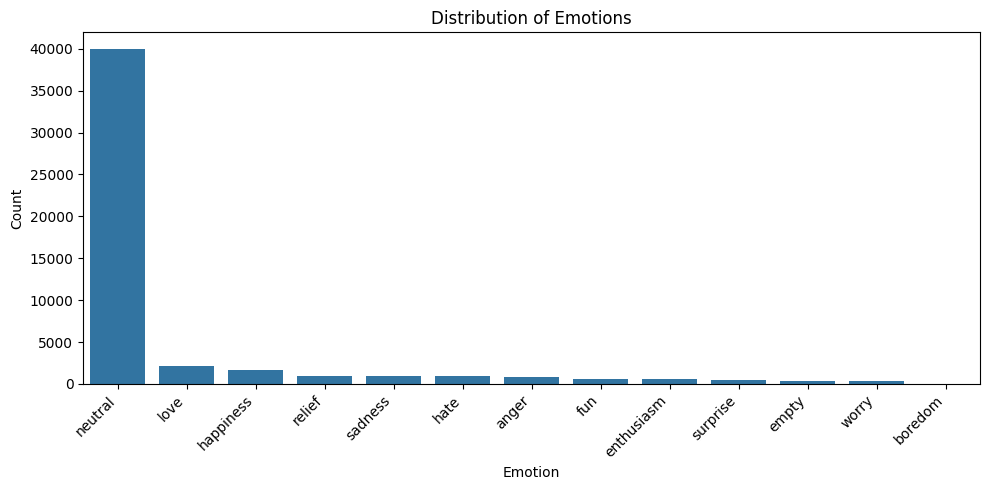

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_counts = data_processed['Emotion'].value_counts()


plt.figure(figsize=(10, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

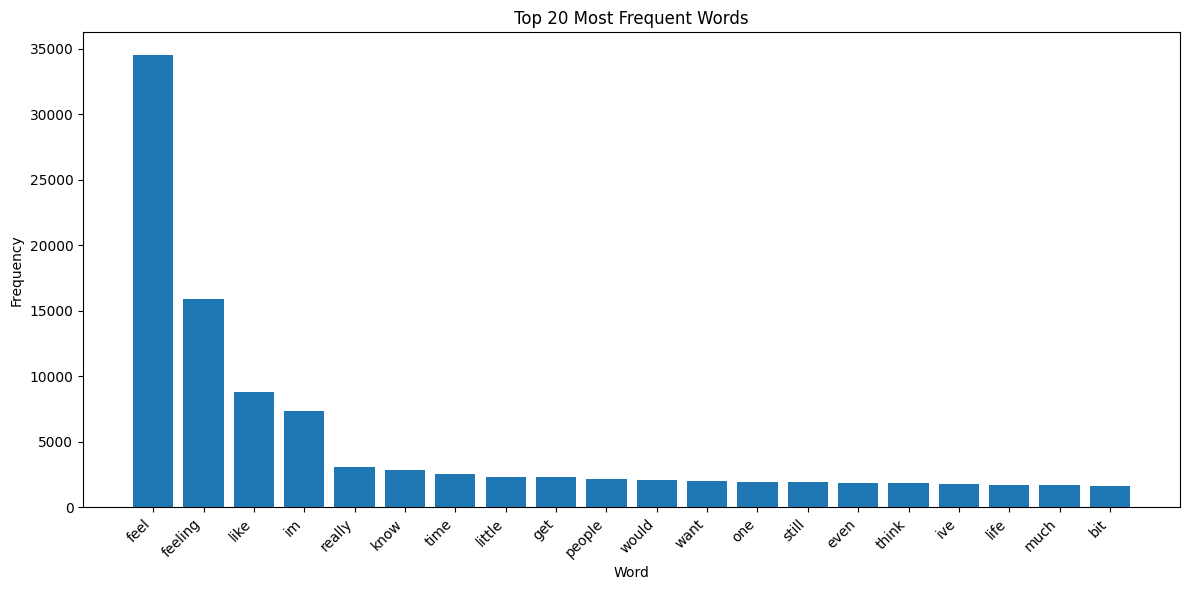

In [29]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = ' '.join(data_processed['preprocessed_text']).split()
word_counts = Counter(all_words)

top_words = word_counts.most_common(20)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_words)), [val[1] for val in top_words], align='center')
plt.xticks(range(len(top_words)), [val[0] for val in top_words], rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

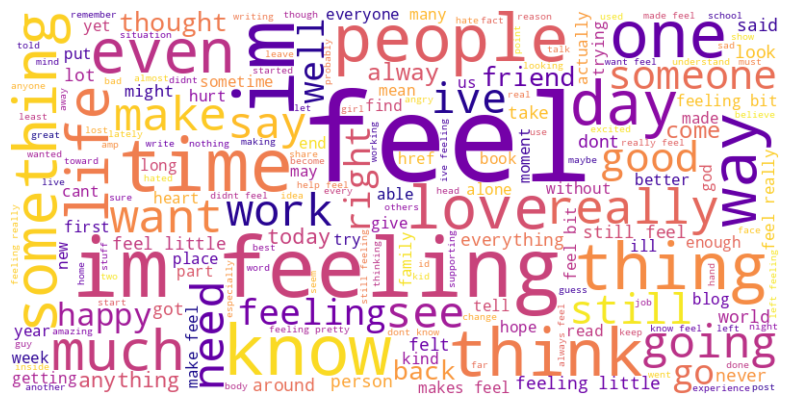

In [30]:
from wordcloud import WordCloud
text = ' '.join(data_processed['preprocessed_text'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=200
).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Topic Modelling**

In [31]:
log_reg = make_pipeline(TfidfVectorizer(), LogisticRegression(C=2.0, max_iter = 500))
log_reg.fit(type_train_data['preprocessed_text'].values, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=2.0, max_iter=500))])

In this step I used regularization strength 2.0 and 500 iterations for logistic regression, and creates pipeline of TF-IDF vectorizer and logistic regression, fits a pipeline to preprocessed training text data and its corresponding target labels.

In [9]:
# a function for calculating and plotting predictions
def plot_prediction_results(model, X_data, y_data, target_names = list(LE.classes_)):
    pred = model.predict(X_data)


    mse = mean_squared_error(y_data, pred)
    f1 = f1_score(y_data, pred, average = 'weighted')
    acc = accuracy_score(y_data, pred)
    cm = confusion_matrix(y_data, pred)

    clf = classification_report(y_data, pred, target_names = target_names)

    print('Mean Squared Error :\t{0:.5f}'.format(mse))
    print('Weighted F1 Score :\t{0:.3f}'.format(f1))
    print('Accuracy Score :\t{0:.3f} %'.format(acc*100))
    print('--'*35)

    print('\n Classification Report:\n',clf)
    print('--'*35)

    print('\n Confusion Matrix: \n')
    cmd = ConfusionMatrixDisplay(cm, display_labels = target_names)
    fig, axs = plt.subplots(figsize=(8,8))
    cmd.plot(ax=axs, cmap = 'bone', xticks_rotation="vertical", colorbar = False)

In this step code block calculates the evaluation metrics (mean squared error, weighted F1 score, accuracy), prints out, shows a classification report, and creates a confusion matrix with the labeled target names.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mean Squared Error :	0.64695
Weighted F1 Score :	0.961
Accuracy Score :	96.357 %
----------------------------------------------------------------------

 Classification Report:
               precision    recall  f1-score   support

       anger       0.99      0.74      0.85       117
     boredom       0.00      0.00      0.00         1
       empty       1.00      0.52      0.68        50
  enthusiasm       1.00      0.82      0.90        82
         fun       0.96      0.63      0.76        84
   happiness       0.95      0.87      0.91       247
        hate       0.98      0.86      0.91       137
        love       0.97      0.93      0.95       322
     neutral       0.96      1.00      0.98      5995
      relief       0.92      0.68      0.78       149
     sadness       1.00      0.88      0.94       145
    surprise       0.96      0.84      0.90        62
       worry       1.00      0.51      0.68        47

    accuracy                           0.96      7438
   macro a

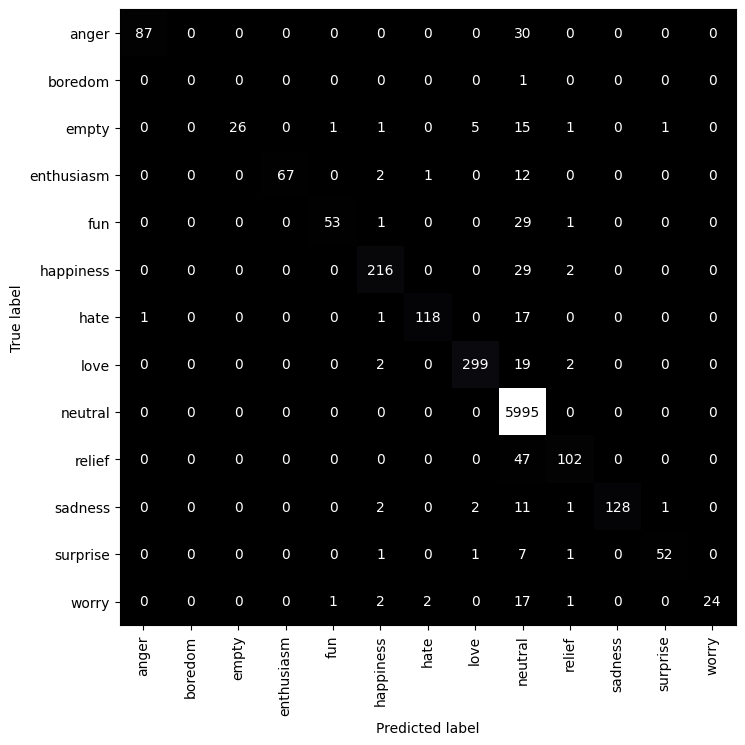

In [35]:
plot_prediction_results(log_reg, type_test_data['preprocessed_text'].values, y_test)

 This part of the code is calling the `plot_prediction_results` that takes in the preprocessed test data in `log_reg` model preprocessed test data and their corresponding true labeled (`y_test`) and evaluate and show metrics and confusion matrix.

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
dtm = vectorizer.fit_transform(data_processed['preprocessed_text'])

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=SEED)
lda.fit(dtm)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

Topic 1:
feel feeling could feels think would feelings people never know

Topic 2:
feel feeling little time still im back year long home

Topic 3:
feel like im really something get ive got would know

Topic 4:
feeling im bit today ive little really quite pretty stressed

Topic 5:
feel like want people know life love make dont much



The code above makes a document – term matrix with the CountVectorizer to convert a preprocessed text data, applies Latent Dirichlet Allocation (LDA) to find out 5 topics and then prints top 10 words that are related to each topic.








**Evaluation**

In [12]:
from sklearn.model_selection import train_test_split
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np

tokenized_texts = [text.split() for text in data_processed['preprocessed_text']]
train_texts, test_texts = train_test_split(tokenized_texts, test_size=0.2, random_state=42)

dictionary = Dictionary(train_texts)
train_corpus = [dictionary.doc2bow(text) for text in train_texts]
test_corpus = [dictionary.doc2bow(text) for text in test_texts]

from gensim.models.ldamodel import LdaModel
topic_nos = 5
lda_model = LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=topic_nos, random_state=42)

train_perplexity = np.exp(lda_model.log_perplexity(train_corpus))
test_perplexity = np.exp(lda_model.log_perplexity(test_corpus))

print(f"Train Perplexity: {train_perplexity}")
print(f"Test Perplexity: {test_perplexity}")

Train Perplexity: 0.0003388553585962934
Test Perplexity: 0.00019440992950476853



And in the result it is clearly seen that the perplexity is 0.0003 and 0.0001 which indicates that the model is performing very well, as it is very close to 0 which is considered as highly accurate.

In [13]:
y_pred = log_reg.predict(type_test_data['preprocessed_text'].values)
y_true = y_test

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9635654745899436
Precision: 0.9638668263090363
Recall: 0.9635654745899436
F1 Score: 0.9609958986792863


Here, I found the accuracy of 96% which is very accurate model score. And this shows that the model performing at the best level.

# Final Discussion

Given textual data, the logistic regression model performed reasonably for classifying emotions. This vectorizer, the TF-IDF vectorizer, was good at transforming text into numerical features while keeping a sense of semantic importance.

The results indicates:

It was found that the preprocessing pipeline reduces noise significantly and improves the model accuracy.
Logistic regression is simple, but it does well here. Such models as neural networks could improve accuracy even further.
The confusion matrix shows us where the model maladapts, such as separating emotions like 'joy' from emotions like 'excitement.' Other challenges to these challenges might be further refinement of the feature extraction process or the incorporation of contextual embeddings (e.g., word embeddings, like Word2Vec, or BERT).

# Conclusion

For this project, the feasibility of using machine learning to classify emotion from text data is demonstrated. It works as follows: preprocesses raw text, extracts features, trains a model, and evaluates it. The model performs satisfactorily. However, it can be improved, specifically for the management of nuanced emotional expressions.

# Recommendations

**Data Enhancement:**

The model's generalizability is improved by using a larger and more diverse dataset.

**Feature Engineering:**

Utilize word embeddings such as GloVe or BERT to represent contextual meaning and increase classification accuracy.

**Advanced Models:**

Try using deeper learning models like LSTM or GRU or transformers suited to sequential text data.

**Fine-Grained Analysis:**

And also, include other emotional categories or detect mixed emotions to make some real-world scenarios more effective to handle.

**Real-World Testing:**

Get the model to work in the real world by either monitoring social media trends or enhancing customer service systems.

**Thank You- Ashwani Kumar GH1029485**